## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import pymc3 as pm

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    
    y = pm.Binomial('y',n=n,p=p,observed=k)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p_interval__]
100%|██████████| 10500/10500 [00:05<00:00, 1871.61it/s]


In [9]:
pm.summary(trace)

mean        sd  mc_error   hpd_2.5  hpd_97.5         n_eff      Rhat
p  0.608036  0.047643  0.000353  0.515199  0.700396  16476.034885  1.000083

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c3ffac8>,
      dtype=object)

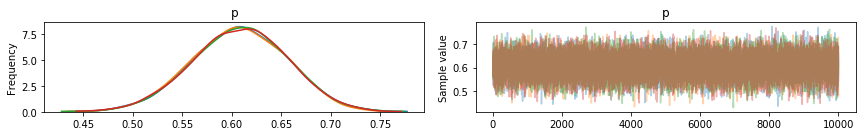

In [10]:
pm.traceplot(trace)

In [11]:
gdata=pd.read_csv('gapminder.csv').query('year == 1985')

In [12]:
gdata.sort_values('age5_surviving',inplace=True)

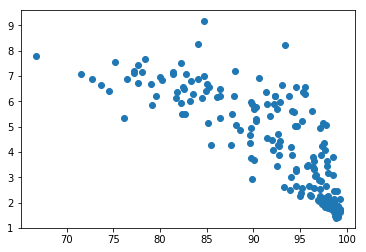

In [13]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [14]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       sd = 1,
                       observed = gdata['babies_per_woman'])
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope_interval__, intercept_interval__]
100%|██████████| 10500/10500 [00:18<00:00, 561.97it/s]
The acceptance probability does not match the target. It is 0.8816212791711134, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [15]:
pm.summary(trace)

mean        sd  mc_error   hpd_2.5   hpd_97.5        n_eff  \
intercept  10.194361  0.280698  0.002852  9.646776  10.747732  9035.559901   
slope      -0.219233  0.010205  0.000104 -0.239636  -0.199625  9100.037641   

               Rhat  
intercept  1.000022  
slope      1.000025

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c212611d0>,
      dtype=object)

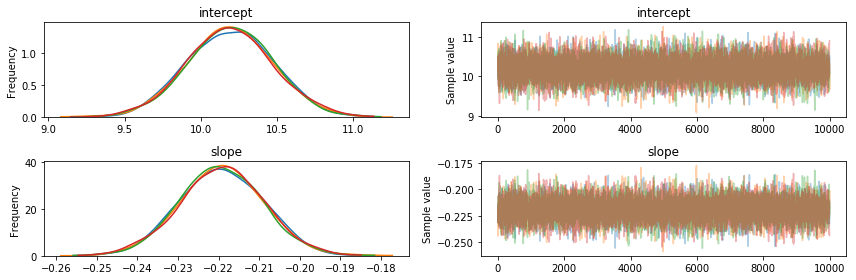

In [16]:
pm.traceplot(trace)

In [17]:
babies = trace['intercept'].mean() + trace['slope'].mean() * (gdata['age5_surviving'] - 65)

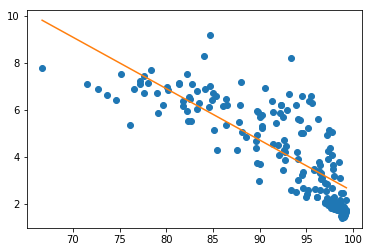

In [18]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

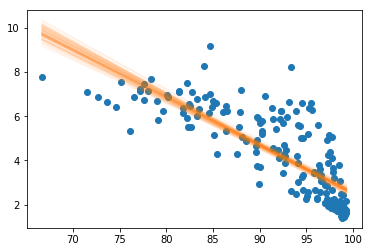

In [19]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)